# Import Libraries 

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

In [141]:
import requests

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim


# Load Data

## Web of Science Dataset 

In [57]:
df_Web = pd.read_excel('savedrecs (5).xls', engine='xlrd') 
df_Web.head()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Adeboa, J; Anang, BT",NaN,NaN,NaN,"Adeboa, John; Anang, Benjamin Tetteh",NaN,NaN,Perceptions and adaptation strategies of small...,COGENT SOCIAL SCIENCES,...,Emerging Sources Citation Index (ESCI),Social Sciences - Other Topics,NaN,NaN,NaN,NaN,NaN,2024-09-15,WOS:001235175000001,0
1,J,"Olaya, JFC; Corrales, JC",NaN,NaN,NaN,"Olaya, Juan Fernando Casanova; Corrales, Juan ...",NaN,NaN,A methodological framework proposal for managi...,FRONTIERS IN SUSTAINABLE FOOD SYSTEMS,...,Science Citation Index Expanded (SCI-EXPANDED),Food Science & Technology,NaN,NaN,NaN,NaN,NaN,2024-09-15,WOS:001283555200001,0
2,J,"Suksa-ngiam, W; Bechor, T",NaN,NaN,NaN,"Suksa-ngiam, Watanyoo; Bechor, Tamir",NaN,NaN,The impact of applying digital process innovat...,INFORMATION DEVELOPMENT,...,Social Science Citation Index (SSCI),Information Science & Library Science,NaN,NaN,NaN,NaN,NaN,2024-09-15,WOS:001241998400001,0
3,J,"Anghileri, D; Chibarabada, TP; Gadedjisso-Toss...",NaN,NaN,NaN,"Anghileri, Daniela; Chibarabada, Tendai Polite...",NaN,NaN,Understanding the maize yield gap in Southern ...,AGRICULTURAL SYSTEMS,...,Science Citation Index Expanded (SCI-EXPANDED),Agriculture,NaN,NaN,NaN,NaN,NaN,2024-09-15,WOS:001290874300001,0
4,J,"Danso-Abbeam, G; Okolie, CC; Ojo, TO; Ogundeji...",NaN,NaN,NaN,"Danso-Abbeam, Gideon; Okolie, Collins C.; Ojo,...",NaN,NaN,Understanding drought impacts on livelihoods a...,NATURAL HAZARDS,...,Science Citation Index Expanded (SCI-EXPANDED),Geology; Meteorology & Atmospheric Sciences; W...,NaN,NaN,NaN,NaN,NaN,2024-09-15,WOS:001215360200001,0


## IEE Dataset

In [16]:
df_IEE = pd.read_csv('IEE-New.csv') 
df_IEE.head()

,Document Title,Authors,Author Affiliations,Publication Title,Date Added To Xplore,Publication Year,Volume,Issue,Start Page,End Page,...,Mesh_Terms,Article Citation Count,Patent Citation Count,Reference Count,License,Online Date,Issue Date,Meeting Date,Publisher,Document Identifier
0,A Novel Approach using Big Data Analytics to I...,B. Vandana; S. S. Kumar,"Dept. of CSE, RNSIT Visvesvaraya Technological...",2018 3rd IEEE International Conference on Rece...,27 Feb 2020,2018,NaN,NaN,824,827,...,NaN,4.0,NaN,14.0,IEEE,27 Feb 2020,NaN,NaN,IEEE,IEEE Conferences
1,Technology Assessment Using Satellite Big Data...,N. P. Nagendra; G. Narayanamurthy; R. Moser; E...,Friedrich Alexander University Erlangen-Nuremb...,IEEE Transactions on Engineering Management,10 Feb 2023,2023,70.0,3.0,1099,1113,...,NaN,5.0,NaN,77.0,IEEE,27 Apr 2022,NaN,NaN,IEEE,IEEE Journals
2,A system dynamics analysis of seed banking eff...,B. Oyo,"Department of Computer Science, Gulu Universit...",2013 IST-Africa Conference & Exhibition,9 Jan 2014,2013,NaN,NaN,1,8,...,NaN,NaN,NaN,10.0,NaN,9 Jan 2014,NaN,NaN,IEEE,IEEE Conferences
3,Analysis of crowd sourced soil data for small ...,S. Sharma; Kausthub Naarayan B; Rajeshwari K,"Department of Computer Science & Engineering, ...",2016 2nd International Conference on Applied a...,27 Apr 2017,2016,NaN,NaN,196,200,...,NaN,1.0,NaN,12.0,IEEE,27 Apr 2017,NaN,NaN,IEEE,IEEE Conferences
4,Assisting Polyculture Farming in Africa,S. Adebola; K. Goldberg,"Autolab, University of California, Berkeley, B...",2021 IEEE AFRICON,25 Oct 2021,2021,NaN,NaN,1,2,...,NaN,1.0,NaN,16.0,IEEE,25 Oct 2021,NaN,NaN,IEEE,IEEE Conferences


## Scopus Dataset

In [14]:
df_Scopus = pd.read_csv('scopus-New.csv') 
df_Scopus.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Page count,Cited by,Link,Affiliations,Authors with affiliations,Abstract,Publisher,Document Type,Source,EID
0,Taylor K.; Amidy M.,"Taylor, Kerry (22433897700); Amidy, Martin (57...",22433897700; 57195300026,Data-driven agriculture for rural smallholdings,2020,Journal of Spatial Information Science,20,NaN,NaN,125.0,...,10.0,3,https://www.scopus.com/inward/record.uri?eid=2...,"Research School of Computer Science, Australia...","Taylor K., Research School of Computer Science...",Spatial information science has a critical rol...,University of Maine,Article,Scopus,2-s2.0-85088784194
1,El Bilali H.; Bottalico F.; Ottomano Palmisano...,"El Bilali, Hamid (37058684500); Bottalico, Fra...",37058684500; 57191545138; 56928470400; 5600586...,Information and communication technologies for...,2020,IFMBE Proceedings,78,NaN,NaN,321.0,...,13.0,18,https://www.scopus.com/inward/record.uri?eid=2...,International Centre for Advanced Mediterranea...,"El Bilali H., International Centre for Advance...","Agriculture faces different environmental, eco...",Springer,Conference paper,Scopus,2-s2.0-85080864678
2,Casanova Olaya J.F.; Corrales J.C.,"Casanova Olaya, Juan Fernando (59243867600); C...",59243867600; 15135119500,A methodological framework proposal for managi...,2024,Frontiers in Sustainable Food Systems,8,NaN,1363744,NaN,...,NaN,0,https://www.scopus.com/inward/record.uri?eid=2...,"Ecotecma S.A.S, Popayán, Colombia; Universidad...","Casanova Olaya J.F., Ecotecma S.A.S, Popayán, ...",Introduction: Climate change and weather varia...,Frontiers Media SA,Article,Scopus,2-s2.0-85200263684
3,Abrar-Ul-Haq M.; Sankar J.P.; Akram F.; Malik ...,"Abrar-Ul-Haq, Muhammad (57189987641); Sankar, ...",57189987641; 57222758353; 57208004109; 5889512...,Harvesting Prosperity: AI-Powered Solutions fo...,2024,2024 IEEE 1st Karachi Section Humanitarian Tec...,NaN,NaN,NaN,NaN,...,NaN,1,https://www.scopus.com/inward/record.uri?eid=2...,"University of Bahrain, College of Business Adm...","Abrar-Ul-Haq M., University of Bahrain, Colleg...",This study explores the potential of smart agr...,Institute of Electrical and Electronics Engine...,Conference paper,Scopus,2-s2.0-85190642213
4,Shukla M.; Tiwari M.K.,"Shukla, Manish (7102610431); Tiwari, Manoj Kum...",7102610431; 35427952100,Big-data analytics framework for incorporating...,2017,Production Planning and Control,28,16.0,NaN,1365.0,...,12.0,44,https://www.scopus.com/inward/record.uri?eid=2...,"Durham University Business School, Durham Univ...","Shukla M., Durham University Business School, ...",This paper aims to address the constraints fac...,Taylor and Francis Ltd.,Article,Scopus,2-s2.0-85031015042


## Google Scholar Dataset

In [186]:
df_Google = pd.read_excel('Google Updated.xlsx', engine='openpyxl')
df_Google['Abstract'] = df_Google['Abstract'].fillna('')
df_Google.head()

,Authors,Title,Abstract
0,"Dhillon, Rajveer; Moncur, Qianna;",Small-scale farming: A review of challenges an...,Smallholder farmers play an important role in ...
1,"Bayih, Amsale Zelalem; Morales, Javier; Assabi...",Utilization of internet of things and wireless...,Agriculture is the economy’s backbone for most...
2,"Amiri-Zarandi, Mohammad; Dara, Rozita A; Dunca...",Big data privacy in smart farming: a review,Smart farming aims to improve farming using mo...
3,"Ray, Shibendu Shankar; Dadhwal, Vinay Kumar; N...",Progress and Challenges in Earth Observation D...,The paper traces the evolution of agricultural...
4,"Eady, Matthew;",Potential for spectral imaging applications on...,Advancements in optics and miniaturisation hav...


# Remove columns with any NaN values From each Dataset

In [83]:
data_cleaned_Web = df_Web.dropna(axis=1)
data_cleaned_Web.head()

,Publication Type,Authors,Author Full Names,Article Title,Source Title,Document Type,Abstract,Addresses,Reprint Addresses,Cited Reference Count,...,"Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publication Year,WoS Categories,Web of Science Index,Research Areas,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Adeboa, J; Anang, BT","Adeboa, John; Anang, Benjamin Tetteh",Perceptions and adaptation strategies of small...,COGENT SOCIAL SCIENCES,Article,Climate change (CC) poses a significant threat...,"[Adeboa, John; Anang, Benjamin Tetteh] Univ De...","Anang, BT (corresponding author), Univ Dev Stu...",78,...,0,3,3,2024,"Social Sciences, Interdisciplinary",Emerging Sources Citation Index (ESCI),Social Sciences - Other Topics,2024-09-15,WOS:001235175000001,0
1,J,"Olaya, JFC; Corrales, JC","Olaya, Juan Fernando Casanova; Corrales, Juan ...",A methodological framework proposal for managi...,FRONTIERS IN SUSTAINABLE FOOD SYSTEMS,Article,Introduction Climate change and weather variab...,"[Olaya, Juan Fernando Casanova] Ecotecma SAS, ...","Olaya, JFC (corresponding author), Ecotecma SA...",150,...,0,0,0,2024,Food Science & Technology,Science Citation Index Expanded (SCI-EXPANDED),Food Science & Technology,2024-09-15,WOS:001283555200001,0
2,J,"Suksa-ngiam, W; Bechor, T","Suksa-ngiam, Watanyoo; Bechor, Tamir",The impact of applying digital process innovat...,INFORMATION DEVELOPMENT,Article; Early Access,Thailand's agricultural sector is the lowest-p...,"[Suksa-ngiam, Watanyoo] King Mongkuts Univ Tec...","Suksa-ngiam, W (corresponding author), King Mo...",100,...,0,3,3,2024,Information Science & Library Science,Social Science Citation Index (SSCI),Information Science & Library Science,2024-09-15,WOS:001241998400001,0
3,J,"Anghileri, D; Chibarabada, TP; Gadedjisso-Toss...","Anghileri, Daniela; Chibarabada, Tendai Polite...",Understanding the maize yield gap in Southern ...,AGRICULTURAL SYSTEMS,Article,CONTEXT: Improving the productivity of smallho...,"[Anghileri, Daniela; Craig, Ailish; Li, Chengx...","Anghileri, D (corresponding author), Univ Sout...",101,...,0,1,1,2024,"Agriculture, Multidisciplinary",Science Citation Index Expanded (SCI-EXPANDED),Agriculture,2024-09-15,WOS:001290874300001,0
4,J,"Danso-Abbeam, G; Okolie, CC; Ojo, TO; Ogundeji...","Danso-Abbeam, Gideon; Okolie, Collins C.; Ojo,...",Understanding drought impacts on livelihoods a...,NATURAL HAZARDS,Article,Drought is one of the main causes of food inse...,"[Danso-Abbeam, Gideon] Univ Dev Studies, Dept ...","Danso-Abbeam, G (corresponding author), Univ D...",57,...,0,9,9,2024,"Geosciences, Multidisciplinary; Meteorology & ...",Science Citation Index Expanded (SCI-EXPANDED),Geology; Meteorology & Atmospheric Sciences; W...,2024-09-15,WOS:001215360200001,0


In [85]:
data_cleaned_IEE = df_IEE.dropna(axis=1)
data_cleaned_IEE.head()

,Document Title,Authors,Author Affiliations,Publication Title,Date Added To Xplore,Publication Year,Start Page,End Page,Abstract,PDF Link,IEEE Terms,Online Date,Publisher,Document Identifier
0,A Novel Approach using Big Data Analytics to I...,B. Vandana; S. S. Kumar,"Dept. of CSE, RNSIT Visvesvaraya Technological...",2018 3rd IEEE International Conference on Rece...,27 Feb 2020,2018,824,827,Agriculture is the main work field in India. F...,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Agriculture;Big Data;Temperature sensors;Inter...,27 Feb 2020,IEEE,IEEE Conferences
1,Technology Assessment Using Satellite Big Data...,N. P. Nagendra; G. Narayanamurthy; R. Moser; E...,Friedrich Alexander University Erlangen-Nuremb...,IEEE Transactions on Engineering Management,10 Feb 2023,2023,1099,1113,Over half of India's employment is attached to...,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Big Data;Crops;Insurance;Satellites;Stakeholde...,27 Apr 2022,IEEE,IEEE Journals
2,A system dynamics analysis of seed banking eff...,B. Oyo,"Department of Computer Science, Gulu Universit...",2013 IST-Africa Conference & Exhibition,9 Jan 2014,2013,1,8,This paper presents seed banking as a holistic...,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Banking;Agriculture;Production;Analytical mode...,9 Jan 2014,IEEE,IEEE Conferences
3,Analysis of crowd sourced soil data for small ...,S. Sharma; Kausthub Naarayan B; Rajeshwari K,"Department of Computer Science & Engineering, ...",2016 2nd International Conference on Applied a...,27 Apr 2017,2016,196,200,Currently in India there is lack of soil healt...,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Soil;Agriculture;Vegetation;Histograms;Mathema...,27 Apr 2017,IEEE,IEEE Conferences
4,Assisting Polyculture Farming in Africa,S. Adebola; K. Goldberg,"Autolab, University of California, Berkeley, B...",2021 IEEE AFRICON,25 Oct 2021,2021,1,2,AlphaGarden is a polyculture garden tended by ...,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Robot vision systems;Africa;Cameras;Data models,25 Oct 2021,IEEE,IEEE Conferences


In [188]:
data_cleaned_Google = df_Google.dropna(axis=1)
data_cleaned_Google.head()

,Authors,Title,Abstract
0,"Dhillon, Rajveer; Moncur, Qianna;",Small-scale farming: A review of challenges an...,Smallholder farmers play an important role in ...
1,"Bayih, Amsale Zelalem; Morales, Javier; Assabi...",Utilization of internet of things and wireless...,Agriculture is the economy’s backbone for most...
2,"Amiri-Zarandi, Mohammad; Dara, Rozita A; Dunca...",Big data privacy in smart farming: a review,Smart farming aims to improve farming using mo...
3,"Ray, Shibendu Shankar; Dadhwal, Vinay Kumar; N...",Progress and Challenges in Earth Observation D...,The paper traces the evolution of agricultural...
4,"Eady, Matthew;",Potential for spectral imaging applications on...,Advancements in optics and miniaturisation hav...


In [183]:
data_cleaned_Scopus = df_Scopus.dropna(axis=1)
data_cleaned_Scopus.head()

,Title,Year,Source title,Cited by,Link,Abstract,Publisher,Document Type,Source,EID
0,Data-driven agriculture for rural smallholdings,2020,Journal of Spatial Information Science,3,https://www.scopus.com/inward/record.uri?eid=2...,Spatial information science has a critical rol...,University of Maine,Article,Scopus,2-s2.0-85088784194
1,Information and communication technologies for...,2020,IFMBE Proceedings,18,https://www.scopus.com/inward/record.uri?eid=2...,"Agriculture faces different environmental, eco...",Springer,Conference paper,Scopus,2-s2.0-85080864678
2,A methodological framework proposal for managi...,2024,Frontiers in Sustainable Food Systems,0,https://www.scopus.com/inward/record.uri?eid=2...,Introduction: Climate change and weather varia...,Frontiers Media SA,Article,Scopus,2-s2.0-85200263684
3,Harvesting Prosperity: AI-Powered Solutions fo...,2024,2024 IEEE 1st Karachi Section Humanitarian Tec...,1,https://www.scopus.com/inward/record.uri?eid=2...,This study explores the potential of smart agr...,Institute of Electrical and Electronics Engine...,Conference paper,Scopus,2-s2.0-85190642213
4,Big-data analytics framework for incorporating...,2017,Production Planning and Control,44,https://www.scopus.com/inward/record.uri?eid=2...,This paper aims to address the constraints fac...,Taylor and Francis Ltd.,Article,Scopus,2-s2.0-85031015042


# Dataset Information 

In [45]:
print(data_cleaned_Web.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Publication Type       42 non-null     object
 1   Authors                42 non-null     object
 2   Author Full Names      42 non-null     object
 3   Article Title          42 non-null     object
 4   Source Title           42 non-null     object
 5   Publication Year       42 non-null     int64 
 6   UT (Unique WOS ID)     42 non-null     object
 7   Web of Science Record  42 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 2.8+ KB
None


In [67]:
print(data_cleaned_IEE.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Document Title        29 non-null     object
 1   Authors               29 non-null     object
 2   Author Affiliations   29 non-null     object
 3   Publication Title     29 non-null     object
 4   Date Added To Xplore  29 non-null     object
 5   Publication Year      29 non-null     int64 
 6   Start Page            29 non-null     int64 
 7   End Page              29 non-null     int64 
 8   Abstract              29 non-null     object
 9   PDF Link              29 non-null     object
 10  IEEE Terms            29 non-null     object
 11  Online Date           29 non-null     object
 12  Publisher             29 non-null     object
 13  Document Identifier   29 non-null     object
dtypes: int64(3), object(11)
memory usage: 3.3+ KB
None


In [194]:
print(data_cleaned_Google.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Authors   78 non-null     object
 1   Title     78 non-null     object
 2   Abstract  78 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB
None


In [71]:
print(data_cleaned_Scopus.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          45 non-null     object
 1   Year           45 non-null     int64 
 2   Source title   45 non-null     object
 3   Cited by       45 non-null     int64 
 4   Link           45 non-null     object
 5   Abstract       45 non-null     object
 6   Publisher      45 non-null     object
 7   Document Type  45 non-null     object
 8   Source         45 non-null     object
 9   EID            45 non-null     object
dtypes: int64(2), object(8)
memory usage: 3.6+ KB
None


# Building the LDA Model (Still Testing Model)

## Web of Science Model

In [73]:
abstracts = data_cleaned_Web['Abstract'].values

# Tokenise and clean the text
stop_words = set(stopwords.words('english'))
#----------------Note
def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation and numbers
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Apply preprocessing to all abstracts
processed_abstracts = [preprocess(abstract) for abstract in abstracts]

# Step 2: Prepare the Corpus
# Create a dictionary and a corpus
dictionary = corpora.Dictionary(processed_abstracts)

# Filter out extremes (optional, based on frequency)
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the documents into bag-of-words format
corpus = [dictionary.doc2bow(text) for text in processed_abstracts]

#-------------Note
# Step 3: Build the LDA Model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

# Step 4: Visualise the LDA Model
# pyLDAvis to visualize the topics
pyLDAvis.enable_notebook()
lda_visualization = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_visualization)


Topic 0: 0.064*"climate" + 0.055*"strategies" + 0.047*"change" + 0.047*"adaptation" + 0.026*"factors" + 0.023*"smallholder" + 0.018*"impact" + 0.017*"development" + 0.015*"adoption" + 0.014*"increase"
Topic 1: 0.042*"crop" + 0.038*"food" + 0.029*"model" + 0.028*"security" + 0.023*"system" + 0.020*"water" + 0.018*"knowledge" + 0.017*"farming" + 0.017*"change" + 0.017*"agriculture"
Topic 2: 0.057*"soil" + 0.047*"water" + 0.043*"adoption" + 0.031*"technologies" + 0.024*"use" + 0.023*"practices" + 0.021*"agriculture" + 0.020*"management" + 0.019*"digital" + 0.018*"used"
Topic 3: 0.054*"yield" + 0.041*"crop" + 0.032*"productivity" + 0.031*"maize" + 0.026*"smallholder" + 0.026*"yields" + 0.020*"large" + 0.019*"based" + 0.017*"among" + 0.016*"high"
Topic 4: 0.047*"adoption" + 0.041*"technologies" + 0.030*"agriculture" + 0.024*"smallholder" + 0.024*"accuracy" + 0.024*"lack" + 0.024*"systems" + 0.024*"training" + 0.018*"results" + 0.018*"crops"


## IEE Model 

In [75]:
abstracts = data_cleaned_IEE['Abstract'].values

# Tokenise and clean the text
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation and numbers
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Apply preprocessing to all abstracts
processed_abstracts = [preprocess(abstract) for abstract in abstracts]

# Step 2: Prepare the Corpus
# Create a dictionary and a corpus
dictionary = corpora.Dictionary(processed_abstracts)

# Filter out extremes (optional, based on frequency)
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the documents into bag-of-words format
corpus = [dictionary.doc2bow(text) for text in processed_abstracts]

# Step 3: Build the LDA Model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

# Step 4: Visualise the LDA Model
# pyLDAvis to visualize the topics
pyLDAvis.enable_notebook()
lda_visualization = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_visualization)

Topic 0: 0.082*"systems" + 0.060*"cloud" + 0.059*"sensors" + 0.056*"iot" + 0.047*"field" + 0.047*"food" + 0.043*"solution" + 0.036*"small" + 0.035*"propose" + 0.032*"management"
Topic 1: 0.110*"model" + 0.056*"yield" + 0.043*"weather" + 0.042*"paper" + 0.041*"used" + 0.038*"process" + 0.036*"accuracy" + 0.033*"smallholder" + 0.032*"high" + 0.031*"small"
Topic 2: 0.088*"india" + 0.074*"agriculture" + 0.070*"production" + 0.060*"technology" + 0.058*"development" + 0.045*"sector" + 0.038*"innovative" + 0.032*"analytics" + 0.030*"study" + 0.029*"technologies"
Topic 3: 0.113*"water" + 0.067*"system" + 0.049*"practices" + 0.049*"many" + 0.042*"management" + 0.040*"model" + 0.037*"food" + 0.037*"crops" + 0.037*"agriculture" + 0.033*"using"
Topic 4: 0.151*"smart" + 0.133*"agriculture" + 0.069*"farming" + 0.056*"access" + 0.054*"technologies" + 0.052*"smallholder" + 0.047*"study" + 0.047*"iot" + 0.045*"potential" + 0.034*"also"


## Scopus Model 

In [77]:
abstracts = data_cleaned_Scopus['Abstract'].values

# Tokenise and clean the text
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation and numbers
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Apply preprocessing to all abstracts
processed_abstracts = [preprocess(abstract) for abstract in abstracts]

# Step 2: Prepare the Corpus
# Create a dictionary and a corpus
dictionary = corpora.Dictionary(processed_abstracts)

# Filter out extremes (optional, based on frequency)
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the documents into bag-of-words format
corpus = [dictionary.doc2bow(text) for text in processed_abstracts]

# Step 3: Build the LDA Model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

# Step 4: Visualise the LDA Model
# pyLDAvis to visualize the topics
pyLDAvis.enable_notebook()
lda_visualization = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_visualization)

Topic 0: 0.032*"smart" + 0.031*"technologies" + 0.031*"digital" + 0.030*"system" + 0.026*"farming" + 0.014*"potential" + 0.013*"irrigation" + 0.012*"sensing" + 0.012*"iot" + 0.012*"food"
Topic 1: 0.057*"climate" + 0.047*"ai" + 0.040*"change" + 0.036*"adoption" + 0.020*"strategies" + 0.019*"practices" + 0.017*"challenges" + 0.016*"factors" + 0.014*"artificial" + 0.014*"adaptation"
Topic 2: 0.021*"study" + 0.020*"supply" + 0.020*"technologies" + 0.019*"food" + 0.019*"strategies" + 0.016*"security" + 0.016*"poverty" + 0.015*"smallholder" + 0.015*"chain" + 0.014*"approach"
Topic 3: 0.030*"crop" + 0.029*"production" + 0.021*"change" + 0.018*"climate" + 0.017*"management" + 0.016*"systems" + 0.015*"knowledge" + 0.014*"study" + 0.013*"technology" + 0.011*"based"
Topic 4: 0.033*"system" + 0.028*"using" + 0.028*"productivity" + 0.028*"model" + 0.023*"study" + 0.023*"growth" + 0.021*"modeling" + 0.020*"farms" + 0.018*"methods" + 0.016*"india"


# Topics Sectioned 

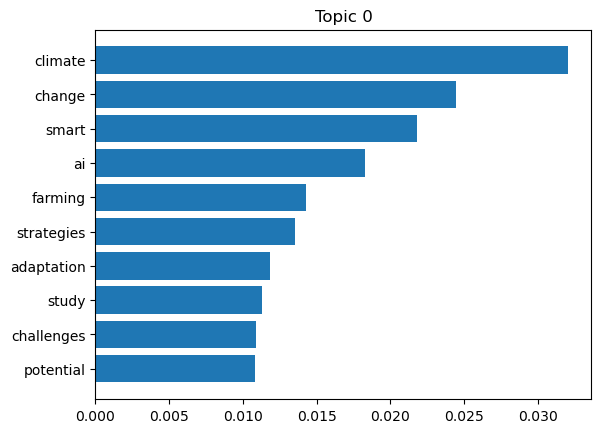

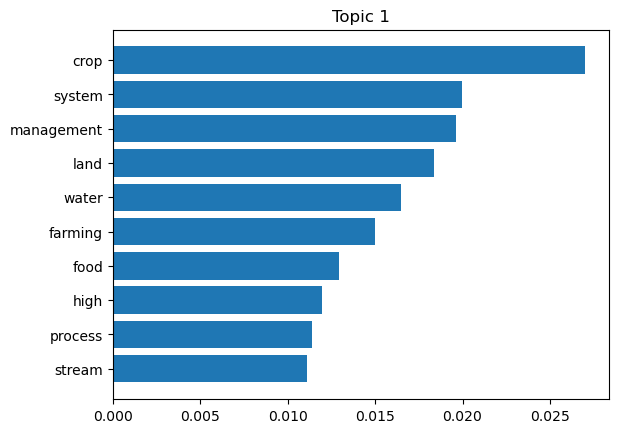

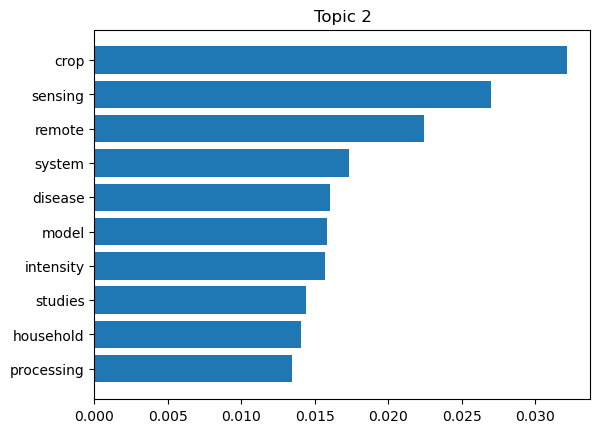

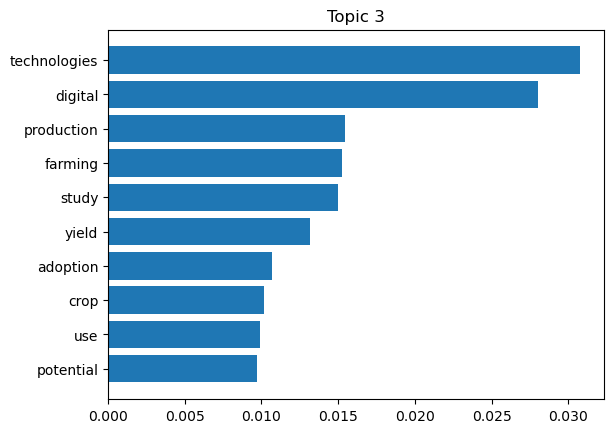

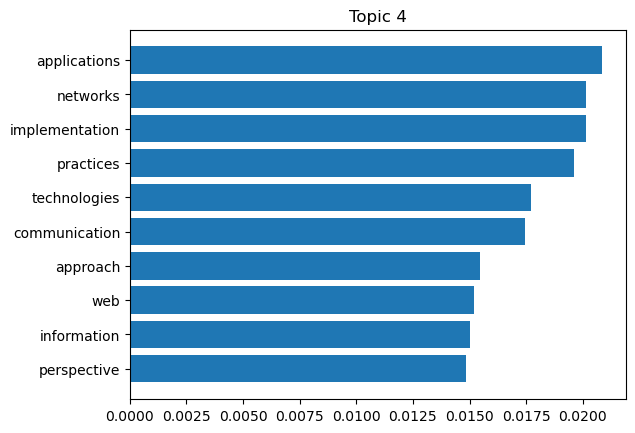

In [56]:
topics = lda_model.show_topics(num_topics=5, num_words=10, formatted=False)

for i, topic in topics:
    words, weights = zip(*topic)
    plt.figure()
    plt.barh(words, weights)
    plt.title(f'Topic {i}')
    plt.gca().invert_yaxis()
    plt.show()

## Anaylsis of the Models 

- Bubbles: Each bubble represents a topic identified by the LDA model. The size of the bubble reflects the proportion of documents in that topic relative to others.
- Distances: The relative positioning of the bubbles shows how similar the topics are to each other. Topics that are close together share more terms or themes, while those that are farther apart are more distinct.
- Principal Component Analysis (PCA): This is a dimensionality reduction technique applied to visualize the high-dimensional space of the topics. It doesn't affect the interpretation but helps create the 2D layout.
In your case:

Topic 1 is the largest (the largest bubble), meaning it's the most popular topic in the dataset.
Topics 2, 3, and 4 have decreasing prominence based on bubble size.

The top 30 most salient terms across all topics. These are words that provide the most information about the topics (i.e., words that are particularly characteristic of one or more topics).
Relevance Slider (λ): You can adjust the relevance metric to change how terms are weighted:
λ = 1: The terms are ranked by their frequency within a given topic.
λ = 0: The terms are ranked by how much they are uniquely specific to a topic.
In this plot, the most frequent terms across the topics seem to include "crop," "digital," "technologies," "climate," "sensing," and "remote"—indicative of a technological and agricultural theme in the dataset.

- Interpreting the Results: The words in the right-hand plot suggest that the dataset revolves around themes like agriculture (crop, land, farming), technology (digital, AI, technologies), environmental concerns (climate, water), and applications (system, implementation, services).

By observing the bubble sizes, Topic 1 seems to dominate, implying that most of the documents relate to this topic, likely focusing heavily on terms such as crop, digital, and technologies. Smaller bubbles indicate more niche topics.

- Topic Similarities: Topics that are close together on the intertopic distance map are likely related. If two topics have overlapping themes, you may find the words in their most salient terms being similar.

How to Dive Deeper:
Explore Individual Topics: In your visualization, you can explore each topic separately by clicking on the bubbles or adjusting the lambda slider to focus on unique versus frequent terms.
Interpret the Top Words: For each topic, look at the top terms to understand what the topic is about. For instance, if Topic 1 includes "crop," "climate," and "sensing," it could be about technology applied to agriculture.

# LDA Showing the Merged Abstract Across the Different Dataset 

In [192]:

# Load the abstracts from all datasets
abstracts_scopus = data_cleaned_Scopus['Abstract'].values
abstracts_ieee = data_cleaned_IEE['Abstract'].values
abstracts_wos = data_cleaned_Web['Abstract'].values
abstracts_Google = data_cleaned_Google['Abstract'].values

# Combine all abstracts into one list
all_abstracts = list(abstracts_scopus) + list(abstracts_ieee) + list(abstracts_wos) + list(abstracts_Google)

# Define stopwords
stop_words = set(stopwords.words('english'))

# Define a function to preprocess the text
def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation and numbers
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Apply preprocessing to all abstracts
processed_abstracts = [preprocess(abstract) for abstract in all_abstracts]

# Step 2: Prepare the Corpus
# Create a dictionary and a corpus
dictionary = corpora.Dictionary(processed_abstracts)

# Filter out extremes (optional, based on frequency)
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the documents into bag-of-words format
corpus = [dictionary.doc2bow(text) for text in processed_abstracts]

# Step 3: Build the LDA Model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, passes=10)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

# Step 4: Visualize the LDA Model
# pyLDAvis to visualize the topics
import pyLDAvis
import pyLDAvis.gensim_models

# Generate the LDA visualization
pyLDAvis.enable_notebook()
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_visualization)


Topic 0: 0.031*"water" + 0.024*"management" + 0.017*"soil" + 0.015*"production" + 0.012*"knowledge" + 0.011*"climate" + 0.011*"information" + 0.011*"system" + 0.011*"crop" + 0.011*"irrigation"
Topic 1: 0.023*"crop" + 0.018*"climate" + 0.017*"strategies" + 0.014*"study" + 0.013*"change" + 0.013*"adaptation" + 0.011*"smallholder" + 0.010*"factors" + 0.010*"extension" + 0.009*"adoption"
Topic 2: 0.017*"crop" + 0.016*"food" + 0.016*"technologies" + 0.013*"adoption" + 0.012*"production" + 0.012*"sustainable" + 0.011*"security" + 0.008*"poverty" + 0.008*"smallholder" + 0.008*"among"
Topic 3: 0.014*"smart" + 0.011*"challenges" + 0.011*"technology" + 0.011*"crop" + 0.010*"production" + 0.009*"farming" + 0.008*"system" + 0.008*"many" + 0.008*"parameters" + 0.008*"water"
Topic 4: 0.033*"smart" + 0.026*"technologies" + 0.026*"farming" + 0.025*"iot" + 0.014*"systems" + 0.012*"digital" + 0.012*"sensors" + 0.011*"internet" + 0.011*"use" + 0.010*"monitoring"
Topic 5: 0.016*"digital" + 0.013*"research

In [200]:
import pyLDAvis.gensim_models as gensimvis

# Generate the full LDA visualization
lda_visualization = gensimvis.prepare(lda_model, corpus, dictionary)

# Display only the Intertopic Distance Map
pyLDAvis.display(lda_visualization)

# Save the Intertopic Distance Map as an HTML file in your Downloads folder
pyLDAvis.save_html(lda_visualization, 'C:/Users/nomat/Downloads/intertopic_distance_map.html')


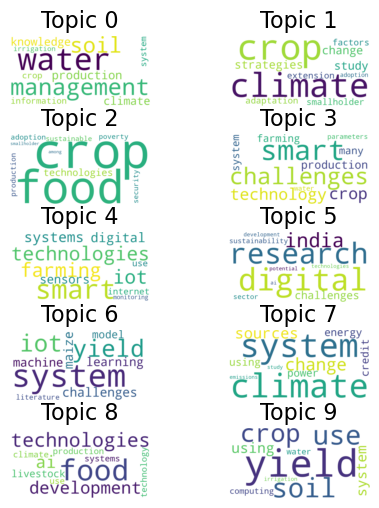

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define topics and their respective keywords (in this case, from the LDA model output)
topics = {
    "Topic 0": "water management soil production knowledge climate information system crop irrigation",
    "Topic 1": "crop climate strategies study change adaptation smallholder factors extension adoption",
    "Topic 2": "crop food technologies adoption production sustainable security poverty smallholder among",
    "Topic 3": "smart challenges technology crop production farming system many parameters water",
    "Topic 4": "smart technologies farming iot systems digital sensors internet use monitoring",
    "Topic 5": "digital research india challenges sustainability sector development technologies ai potential",
    "Topic 6": "yield systems iot challenges system maize learning machine model literature",
    "Topic 7": "climate system change sources energy using power credit emissions study",
    "Topic 8": "food technologies development ai livestock production climate systems technology use",
    "Topic 9": "soil use crop yields using system yield computing water irrigation"
}


# Set up a 5x2 grid layout for 10 topics
fig, axes = plt.subplots(5, 2, figsize=(5, 6))  # Adjust the size as needed
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust space between plots

# Flatten axes array for easier iteration
axes = axes.flatten()

# Generate and plot the word clouds for each topic
for i, (topic, text) in enumerate(topics.items()):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud in the corresponding subplot
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].set_title(topic, fontsize=16)
    axes[i].axis("off")  # Hide the axis

# Display the grid of word clouds
plt.show()




In [37]:
# Save the entire figure to a file
plt.savefig("wordcloud_topics.png", bbox_inches='tight', dpi=200)  # Save as PNG with high resolution
plt.show()

<Figure size 640x480 with 0 Axes>